In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import colormaps
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import plot_tree

## Import Data and Conduct EDA

In [21]:
# import dataset
boston = pd.read_csv("C:/Users/14027/Documents/Graduate_Schoolish/DSC_640/Datasets/boston.csv")
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [22]:
# # Column Adjustments
# boston['CRIM'] = boston['CRIM']*100
# boston

In [23]:
# Check for any null values 
boston.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

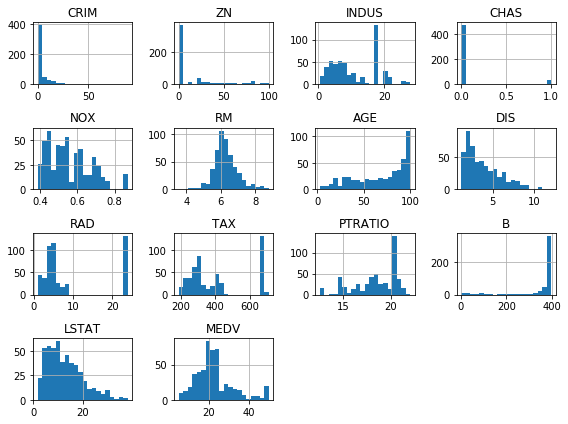

In [24]:
# Plot the Histogram of all of the columns 
boston.hist(bins=20, figsize =(8,6))
plt.tight_layout()
plt.show()


### Some distributions that stick out to me is the LSTAT and DIS has very strong right skew which could indicate There is alot of homes that around low status people and are close to the top employment centers in the city. 

### The age column is skewed to the left which means that more of the homes in the market were built before 1940

### Host of the homes are also in lower crime areas and a lot of these homes have around 6 rooms. 

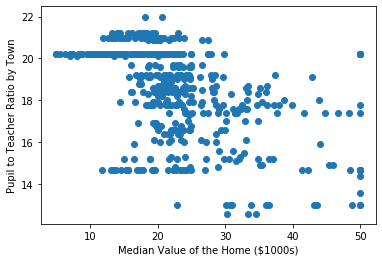

In [25]:
# Pupil to Teacher ratio
plt.scatter(boston['MEDV'],boston['PTRATIO'])
plt.xlabel('Median Value of the Home ($1000s)')
plt.ylabel('Pupil to Teacher Ratio by Town')
# plt.title('Scatter Plot of One Column')
plt.show()

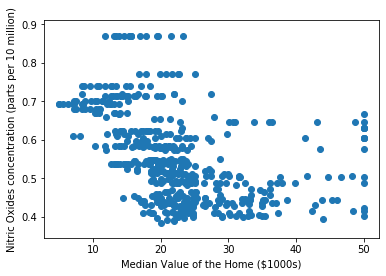

In [26]:
# NOX concentration scatter plot
plt.scatter(boston['MEDV'],boston['NOX'])
plt.xlabel('Median Value of the Home ($1000s)')
plt.ylabel('Nitric Oxides concentration (parts per 10 million)')
# plt.title('Scatter Plot of One Column')
plt.show()

## Random Forest Modeling

In [27]:
# Define 
X = boston.drop('MEDV', axis=1)
y = boston['MEDV']

# Enconding and Scaling the data 
scale = StandardScaler()
X = scale.fit_transform(X)

In [28]:
# Training 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Run the Random Forest Model 
rf = RandomForestRegressor(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [29]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print(f"RMSE: {rmse}, R²: {r2}")

RMSE: 3.1545728425537827, R²: 0.8993059528052927


## Visualzation Tree

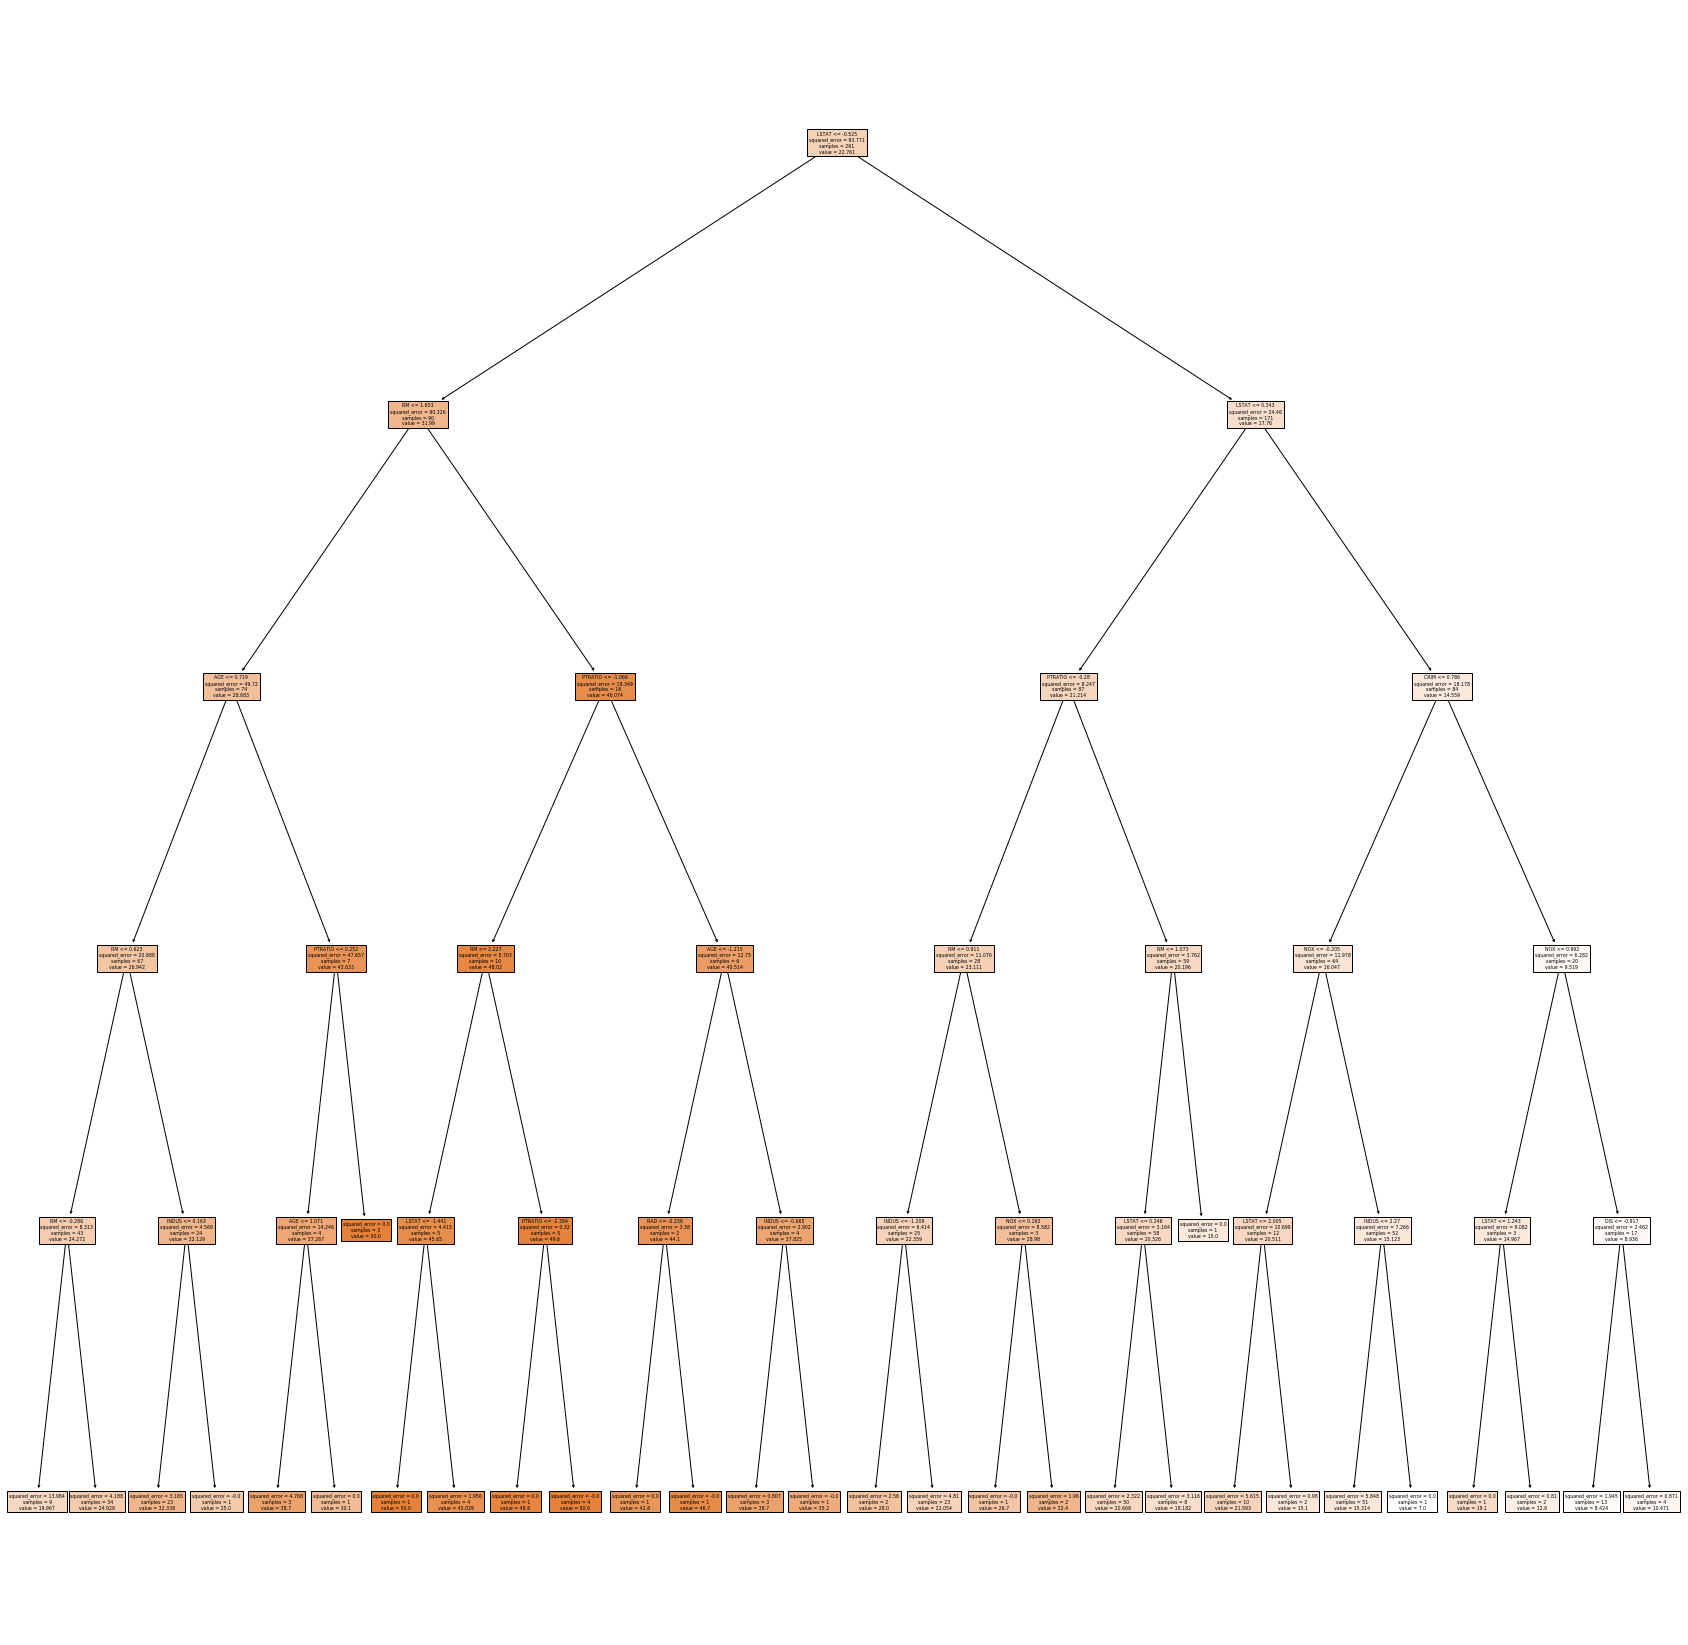

In [30]:
# Extract the infivifual decision tree
col_names = boston.columns
individual_tree = rf.estimators_[1]
# Visualize the decision tree
plt.figure(figsize=(30, 30))
plot_tree(individual_tree,
          feature_names=col_names,
          filled=True)
plt.show()